In [55]:
# Raw Package
import numpy as np
import pandas as pd

#Data Source
import ccxt

#Data viz
# import plotly.graph_objs as go



# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score,confusion_matrix

# pipeline
from sklearn.pipeline import Pipeline

In [5]:
intervals = {'15m':'60d','1h':'8mo','1d':'12mo'}

In [12]:
dfs = []
for inter in intervals:
    dfs.append(yf.download(tickers='BTC-USD', period = intervals[inter], interval = inter))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [54]:
a = dfs[1].reset_index()
a = a[a['Datetime'].dt.strftime('%Y-%m-%d') == '2025-05-22']
a[['Volume']].sum()

Price   Ticker 
Volume  BTC-USD    19227295744
dtype: int64

In [61]:
a

Price,Datetime,Close,High,Low,Open,Volume
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
5774,2025-05-22 00:00:00+00:00,109864.109375,110001.734375,109316.867188,109666.359375,3845390336
5775,2025-05-22 01:00:00+00:00,109893.359375,110505.757812,109707.625000,109916.937500,3080208384
5776,2025-05-22 02:00:00+00:00,110505.960938,110932.359375,109926.054688,109926.054688,764149760
5777,2025-05-22 03:00:00+00:00,111804.109375,111818.671875,110369.554688,110481.195312,2611945472
5778,2025-05-22 04:00:00+00:00,111487.757812,111746.117188,111271.593750,111746.117188,2222194688
5779,2025-05-22 05:00:00+00:00,110906.140625,111585.195312,110906.140625,111492.226562,0
5780,2025-05-22 06:00:00+00:00,110499.007812,111143.304688,110493.828125,110828.734375,1648328704
5781,2025-05-22 07:00:00+00:00,111099.515625,111099.515625,110518.890625,110546.914062,0
5782,2025-05-22 08:00:00+00:00,110425.054688,111118.851562,110391.593750,111052.406250,229163008


In [45]:
b = dfs[2].reset_index()
b[b['Date'].dt.strftime('%Y-%m-%d') == '2025-05-22']

Price,Date,Close,High,Low,Open,Volume
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
364,2025-05-22,111673.28125,111970.171875,109285.070312,109673.492188,70157575642


In [108]:
variations = [2,4,6,8]

for df in dfs:
    for var in variations:
        df['var_'+str(var)] = df['High']/df.shift(-var)['Open']-1
        


In [109]:
dfs[1]

,Open,High,Low,Close,Adj Close,Volume,var_2,var_4,var_6,var_8,target
2021-01-01 11:00:00+00:00,738.013245,742.043030,737.489197,739.375061,739.375061,0,0.009647,0.003915,0.005920,0.021853,False
2021-01-01 12:00:00+00:00,739.467834,743.695435,734.920227,734.920227,734.920227,1201792000,0.002804,0.009032,0.017952,0.021702,False
2021-01-01 13:00:00+00:00,734.952698,742.565613,734.950562,741.619202,741.619202,0,0.004622,0.006629,0.022573,0.015776,False
2021-01-01 14:00:00+00:00,741.615784,743.506042,738.511414,739.106567,739.106567,0,0.008775,0.017693,0.021442,0.018077,False
2021-01-01 15:00:00+00:00,739.148987,740.603577,736.279236,737.216187,737.216187,0,0.003969,0.019871,0.013092,0.013982,False
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01 08:00:00+01:00,3522.605957,3543.117188,3509.121826,3518.656738,3518.656738,0,0.002038,-0.002440,NaN,NaN,False
2021-09-01 09:00:00+01:00,3522.294678,3538.214844,3516.955811,3534.954102,3534.954102,84570112,0.000199,NaN,NaN,NaN,False
2021-09-01 10:00:00+01:00,3535.912354,3554.589600,3532.041260,3543.528076,3543.528076,339857408,0.000790,NaN,NaN,NaN,False
2021-09-01 11:00:00+01:00,3537.511719,3553.284912,3525.920410,3552.458496,3552.458496,375574528,NaN,NaN,NaN,NaN,False


In [77]:
ohlcv = ccxt.binance().fetch_ohlcv('BTC/USDT', timeframe='1h', limit=50)

In [78]:
c = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
c['timestamp'] = pd.to_datetime(c['timestamp'], unit='ms')
c


,timestamp,open,high,low,close,volume
0,2025-05-21 09:00:00,106372.46,106523.81,106100.01,106200.03,796.538540
1,2025-05-21 10:00:00,106200.03,106450.00,106136.99,106328.57,551.730930
2,2025-05-21 11:00:00,106328.56,106741.71,106272.72,106546.44,611.682200
3,2025-05-21 12:00:00,106546.43,106920.21,106409.92,106573.11,789.957530
4,2025-05-21 13:00:00,106573.10,107662.08,106329.47,107244.76,1192.944960
5,2025-05-21 14:00:00,107244.75,109000.00,107009.06,108999.99,4814.026310
6,2025-05-21 15:00:00,108999.99,109458.00,108332.26,108973.35,4908.565690
7,2025-05-21 16:00:00,108973.34,109845.00,108701.54,109131.70,3551.890390
8,2025-05-21 17:00:00,109131.71,109343.01,106117.67,106592.79,6249.915470
9,2025-05-21 18:00:00,106592.80,107415.83,106317.00,106965.05,2576.432270


In [76]:
ohlcv = ccxt.binance().fetch_ohlcv('BTC/USDT', timeframe='1d', limit=5)
d = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
d['timestamp'] = pd.to_datetime(d['timestamp'], unit='ms')
# d.loc[465:488,'volume'].sum()*1000000
d

,timestamp,open,high,low,close,volume
0,2025-05-19,106454.27,107108.62,102000.00,105573.74,30260.035240
1,2025-05-20,105573.73,107320.00,104184.72,106849.99,23705.482750
2,2025-05-21,106850.00,110797.38,106100.01,109643.99,45531.040345
3,2025-05-22,109643.99,111980.00,109177.37,111696.21,31630.773130
4,2025-05-23,111696.22,111800.00,110407.89,111040.00,7466.636870


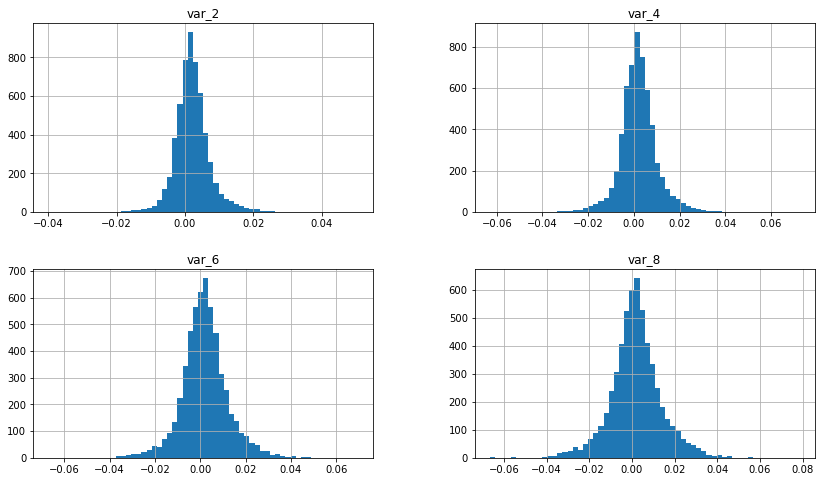

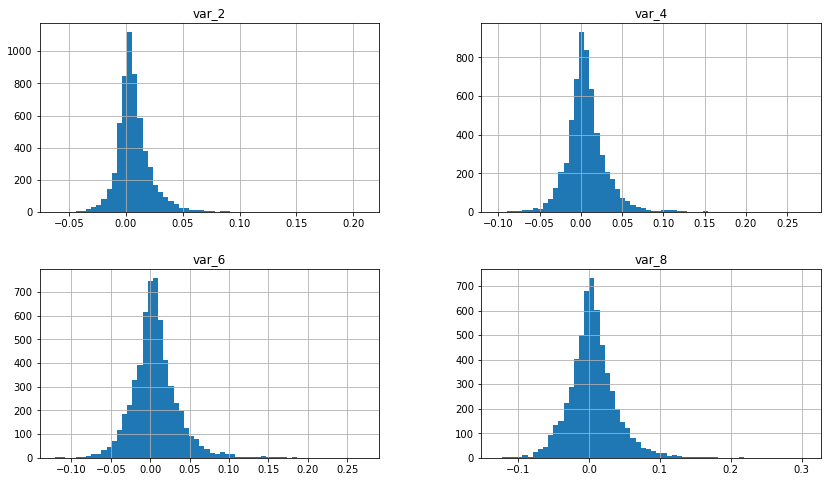

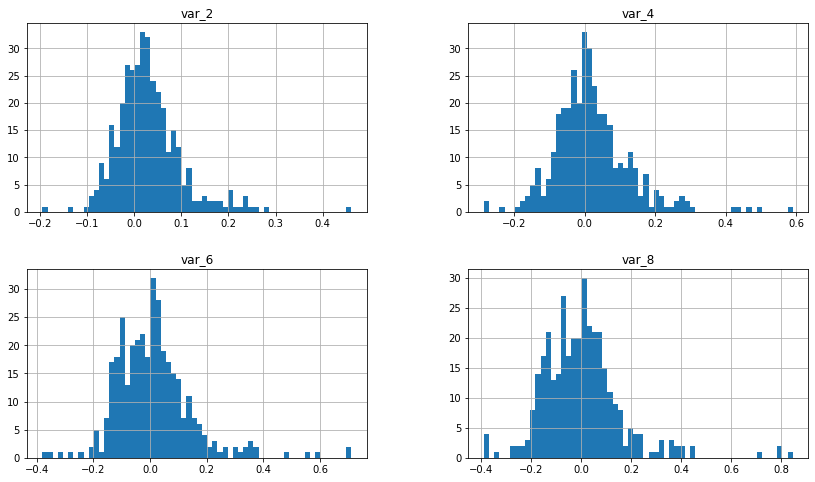

In [110]:
for df in dfs:
    df[['var_'+str(var) for var in variations]].hist(bins = 60,figsize = (14,8))

In [154]:
data = dfs[1]
# data['target'] = data['var_6'] >= 0.015
data['target'] = (data['var_6'] >= 0.015) | (data['var_4'] >= 0.015)
data['target'].mean()

0.37648068669527895

In [155]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,var_2,var_4,var_6,var_8,target
2021-09-01 08:00:00+01:00,3522.605957,3543.117188,3509.121826,3518.656738,3518.656738,0,0.002038,-0.00244,NaN,NaN,False
2021-09-01 09:00:00+01:00,3522.294678,3538.214844,3516.955811,3534.954102,3534.954102,84570112,0.000199,NaN,NaN,NaN,False
2021-09-01 10:00:00+01:00,3535.912354,3554.589600,3532.041260,3543.528076,3543.528076,339857408,0.000790,NaN,NaN,NaN,False
2021-09-01 11:00:00+01:00,3537.511719,3553.284912,3525.920410,3552.458496,3552.458496,375574528,NaN,NaN,NaN,NaN,False
2021-09-01 11:47:55+01:00,3551.783691,3551.783691,3551.783691,3551.783691,3551.783691,0,NaN,NaN,NaN,NaN,False


In [156]:
data = data[['Open','High','Low','Close','Volume','target']]

In [157]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('target', axis=1),  # predictors
    data['target'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((4660, 5), (1165, 5))

In [158]:
print(y_train.mean())
print(y_test.mean())

0.37553648068669526
0.3802575107296137


In [159]:
# set up the pipeline
trade_pipe = Pipeline([

    # scale
    ('scaler', StandardScaler()),

    ('Logit', LogisticRegression(C=0.0005,class_weight='balanced', random_state=0)),
])

In [160]:
trade_pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Logit',
                 LogisticRegression(C=0.0005, class_weight='balanced',
                                    random_state=0))])

In [161]:
# make predictions for train set
class_ = trade_pipe.predict(X_train)
pred = trade_pipe.predict_proba(X_train)[:,1]

# determine mse and rmse
print('train roc-auc: {}'.format(roc_auc_score(y_train, pred)))
print('train accuracy: {}'.format(accuracy_score(y_train, class_)))
print(confusion_matrix(y_train,class_))
print()

# make predictions for test set
class_ = trade_pipe.predict(X_test)
pred = trade_pipe.predict_proba(X_test)[:,1]

# determine mse and rmse
print('test roc-auc: {}'.format(roc_auc_score(y_test, pred)))
print('test accuracy: {}'.format(accuracy_score(y_test, class_)))
print(confusion_matrix(y_test,class_))
print()

train roc-auc: 0.512487383406971
train accuracy: 0.5435622317596567
[[1712 1198]
 [ 929  821]]

test roc-auc: 0.49408777974400186
test accuracy: 0.5210300429184549
[[412 310]
 [248 195]]



In [7]:

#declare figure
fig = go.Figure()

#Candlestick
fig.add_trace(go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'], name = 'market data'))

# Add titles
fig.update_layout(
    title='Bitcoin live share price evolution',
    yaxis_title='Bitcoin Price (kUS Dollars)')

# X-Axes
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=15, label="15m", step="minute", stepmode="backward"),
            dict(count=45, label="45m", step="minute", stepmode="backward"),
            dict(count=1, label="HTD", step="hour", stepmode="todate"),
            dict(count=6, label="6h", step="hour", stepmode="backward"),
            dict(step="all")
        ])
    )
)

#Show
fig.show()

[*********************100%***********************]  1 of 1 completed


In [4]:
yf.download()

TypeError: download() missing 1 required positional argument: 'tickers'